In [49]:
import pandas as pd
import akshare as ak
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
sns.set(font='BBXY')
plt.rcParams['font.sans-serif'] = ['BBXY'] 
plt.rcParams['axes.unicode_minus'] = False 
df = ak.stock_zh_a_spot_em()
df.to_excel('example2.xlsx', sheet_name='Sheet1', index=False)

In [50]:
import pandas as pd
import akshare as ak
df=ak.stock_zh_a_hist(symbol='688256', period='daily', start_date='20230701', end_date='20240601', adjust='qfq')
df.to_csv('688256a.csv',index=False)

findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.


Test Statistic: -2.343773
p-value: 0.158239
No. of lags used: 0.000000
Number of observations used: 221.000000
critical value 1%: -3.460291
critical value 5%: -2.874709
critical value 10%: -2.573789


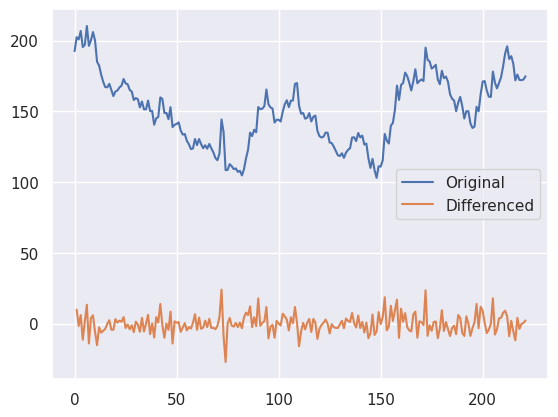

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
lit=['收盘']
data=df[lit]
result = adfuller(data)
print("Test Statistic: %f" % result[0])
print("p-value: %f" % result[1])
print("No. of lags used: %f" % result[2])
print("Number of observations used: %f" % result[3])
print("critical value 1%%: %f" % result[4]["1%"])
print("critical value 5%%: %f" % result[4]["5%"])
print("critical value 10%%: %f" % result[4]["10%"])
if result[1] > 0.05:
    diff_data = data.diff().dropna()
    plt.figure()
    plt.plot(data, label='Original')
    plt.plot(diff_data, label='Differenced')
    plt.legend()
    data = diff_data
else:
    plt.figure()
    plt.plot(data, label='Original')
    plt.legend()

findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.


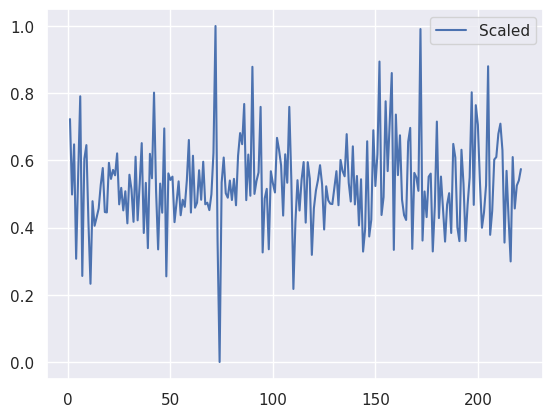

In [52]:
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
plt.figure()
plt.plot(scaled_data, label='Scaled')
plt.legend()

min aci: (2, 1, 3)


findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.


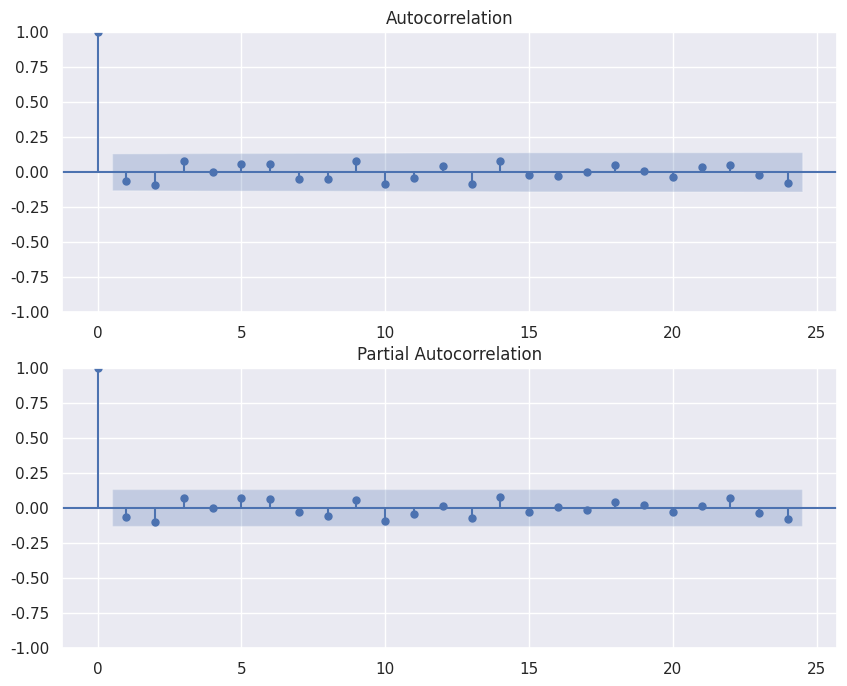

In [53]:
aic_values = {}
for p in range(6):
    for q in range(6):
        try:
            model = ARIMA(scaled_data, order=(p, 1, q))
            result = model.fit()
            aic_values[(p, 1, q)] = result.aic
        except:
            continue
min_aic = min(aic_values, key=aic_values.get)
print("min aci:", min_aic)
model = ARIMA(scaled_data, order=min_aic)
result = model.fit()
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(scaled_data, ax=axes[0])
plot_pacf(scaled_data, ax=axes[1])
plt.show()

In [54]:
stock_file = '688256a.csv'
df = pd.read_csv(stock_file, index_col='日期', parse_dates=True)
df

,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
日期,,,,,,,,,,,
2023-07-03,688256,187.02,192.54,199.00,181.00,114307,2.160025e+09,9.57,2.41,4.54,4.68
2023-07-04,688256,190.00,202.41,205.20,187.28,118369,2.349024e+09,9.31,5.13,9.87,4.85
2023-07-05,688256,199.49,200.80,206.74,196.51,74937,1.511240e+09,5.05,-0.80,-1.61,3.07
2023-07-06,688256,198.22,206.82,217.80,198.22,109094,2.293471e+09,9.75,3.00,6.02,4.47
2023-07-07,688256,206.82,195.43,209.60,187.87,93416,1.833783e+09,10.51,-5.51,-11.39,3.83
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-27,688256,170.00,175.99,177.60,165.98,98148,1.687678e+09,6.76,2.38,4.09,2.36
2024-05-28,688256,174.51,172.25,183.00,172.00,80918,1.428303e+09,6.25,-2.13,-3.74,1.94
2024-05-29,688256,174.30,172.00,178.64,170.11,57707,1.005904e+09,4.95,-0.15,-0.25,1.39


findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.


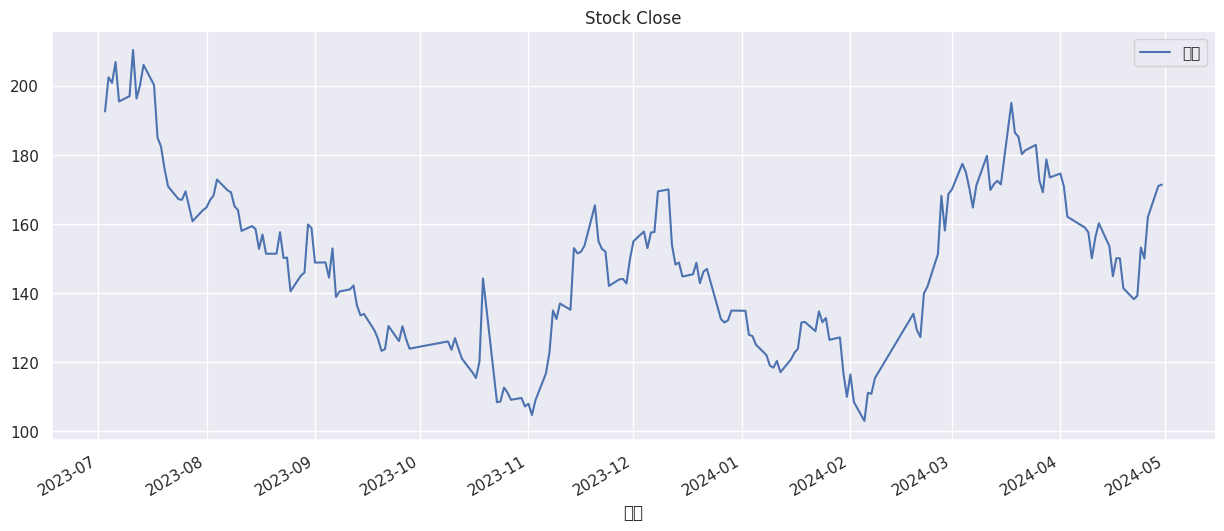

In [55]:
stock_week = df['收盘']#.resample('W-MON').mean()
stock_train = stock_week['2023-07-01':'2024-05-01']
stock_actual=stock_week['2024-05-01':'2024-06-01']
stock_train.plot(figsize=(15,6))
plt.legend()
plt.title('Stock Close')
sns.despine()

In [56]:
stock_train

日期
2023-07-03    192.54
2023-07-04    202.41
2023-07-05    200.80
2023-07-06    206.82
2023-07-07    195.43
               ...  
2024-04-24    153.19
2024-04-25    150.00
2024-04-26    161.99
2024-04-29    171.01
2024-04-30    171.39
Name: 收盘, Length: 202, dtype: float64

In [57]:
stock_actual=stock_week['2024-05-01':'2024-06-01']

findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.


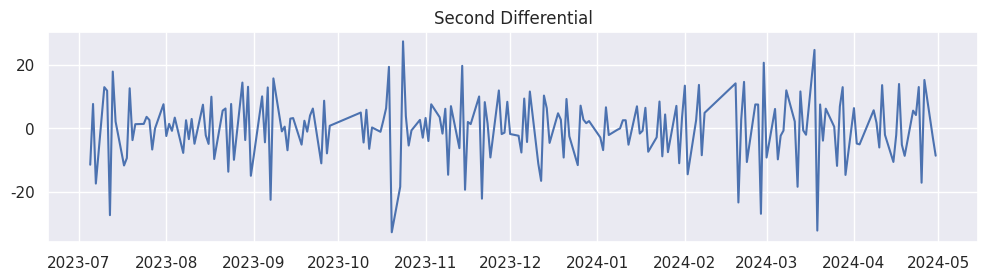

In [58]:
# 将时间序列进行差分并确定参数d
# 一阶差分
stock_diff_1 = stock_train.diff()
stock_diff_1.dropna(inplace=True)
# 二阶差分
stock_diff_2 = stock_diff_1.diff()
stock_diff_2.dropna(inplace=True)
plt.figure(figsize=(12,6))

plt.subplot(2,1,2)
plt.plot(stock_diff_2)
plt.title('Second Differential')
plt.show()

### 拟合ARIMA模型

In [59]:
model = sm.tsa.ARIMA(stock_train, order=(2, 1, 3))
result = model.fit()

In [60]:
stock_future = stock_week['2024-05-01':]

In [61]:
# 使用该模型进行预测
forecast = result.forecast(len(stock_future))
forecast.index=stock_future.index

In [62]:
forecast

日期
2024-05-06    173.741999
2024-05-07    177.559249
2024-05-08    181.925143
2024-05-09    185.996901
2024-05-10    189.088455
2024-05-13    190.772756
2024-05-14    190.925432
2024-05-15    189.709330
2024-05-16    187.509992
2024-05-17    184.839630
2024-05-20    182.230519
2024-05-21    180.138058
2024-05-22    178.869489
2024-05-23    178.547754
2024-05-24    179.112527
2024-05-27    180.353651
2024-05-28    181.967010
2024-05-29    183.620149
2024-05-30    185.014779
2024-05-31    185.935478
Name: predicted_mean, dtype: float64

findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.


findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.


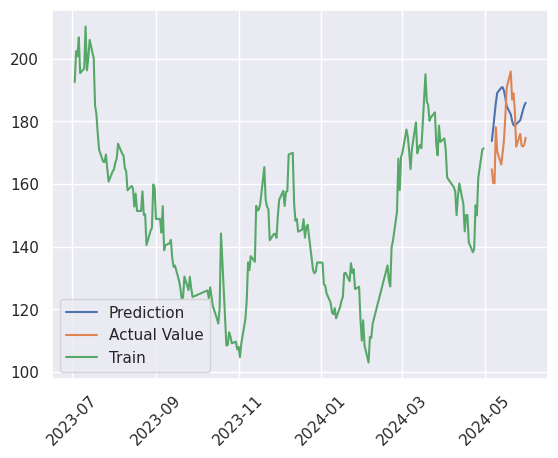

In [63]:
plt.xticks(rotation=45)
plt.plot(forecast,label='Prediction')
plt.plot(stock_actual,label='Actual Value')
plt.plot(stock_train,label='Train')
plt.legend()
plt.show()

findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.
findfont: Font family 'BBXY' not found.


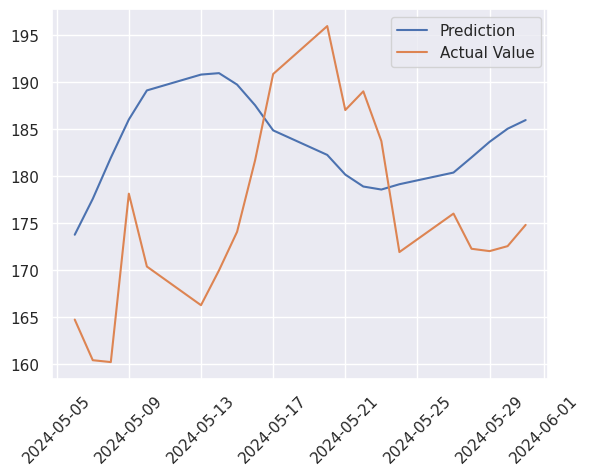

In [64]:
plt.xticks(rotation=45)
plt.plot(forecast,label='Prediction')
plt.plot(stock_actual,label='Actual Value')
plt.legend()
plt.show()